# Emotive Text Analytics
## A project focused on analyzing written text to understand and interpret emotions expressed within it.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb

# Load the Dataset

In [6]:
df = pd.read_csv("C:/Users/ajayj/OneDrive/Desktop/Emotive Text Analytics/Dataset/emotion_dataset_raw.csv")

In [7]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [8]:
df.tail()

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


In [9]:
df.count()

Emotion    34792
Text       34792
dtype: int64

In [12]:
df['Emotion'].count()

34792

In [17]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

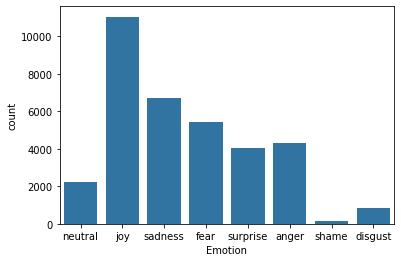

In [20]:
sb.countplot(x = 'Emotion', data = df)

# Preprocessing

In [25]:
# NeatText: a simple NLP package for cleaning textual data and text preprocessing. 
# Simplifying Text Cleaning For NLP & ML
import neattext.functions as ntf

In [26]:
# Remove the user handles
df['Clean_Text'] = df['Text'].apply(ntf.remove_userhandles)

In [29]:
df['Clean_Text'].head() #removed all username included in the dataset e.g @Iluvmiasantos

0                                               Why ? 
1      Sage Act upgrade on my to do list for tommorow.
2    ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3     Such an eye ! The true hazel eye-and so brill...
4      ugh babe.. hugggzzz for u .!  babe naamazed ...
Name: Clean_Text, dtype: object

In [32]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...


In [30]:
df['Clean_Text'].tail() #removed all username included in the dataset e.g @MichelGW

34787      have you gift! Hope you like it! It's hand m...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Clean_Text, dtype: object

In [34]:
# other function available in the ntf library
dir(ntf)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [35]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(ntf.remove_stopwords)  #stopwords e.g a, an, is, the, but, or have......

In [36]:
df['Clean_Text'].head()

0                                                    ?
1                      Sage Act upgrade list tommorow.
2    WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3    eye ! true hazel eye-and brilliant ! Regular f...
4    ugh babe.. hugggzzz u .! babe naamazed nga ako...
Name: Clean_Text, dtype: object

### Splitting data into input variables and target variable

### X: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

### Y: Labels are the output or the target variable.

In [39]:
x = df['Clean_Text']
y = df['Emotion']

# Training
## Splitting data into train and test set

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter = 1000))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.6309814628538584

In [45]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6324184509268573

In [46]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5717775542462997

In [55]:
pipe_dt = Pipeline(steps=[('cv',CountVectorizer()),('dt', DecisionTreeClassifier())])
pipe_dt.fit(x_train,y_train)
pipe_dt.score(x_test,y_test)

0.5516597212243138

In [57]:
pipe_gb = Pipeline(steps=[('cv',CountVectorizer()),('gb', GradientBoostingClassifier())])
pipe_gb.fit(x_train,y_train)
pipe_gb.score(x_test,y_test)

0.531398189395028

# Save the Model
## Logistic Regression was chosen due to its simplicity and efficiency, providing competitive accuracy while maintaining interpretability and ease of implementation.

In [58]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# Tried to increase accuracy by Cross - validation

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe_lr, x, y, cv=10)  # 5-fold cross-validation
print(f"Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}")

Mean Accuracy: 0.6403776930879199, Standard Deviation: 0.010953308378368892


# Test

In [71]:
import joblib


model = joblib.load("text_emotion.pkl")

txt = 'Tears welled up as she hugged her knees.'

op = model.predict([txt])[0]
print(op)

sadness


In [72]:
import joblib


model = joblib.load("text_emotion.pkl")

txt = 'His eyes widened in shock as he opened the gift.'

op = model.predict([txt])[0]
print(op)

surprise


In [81]:
import joblib


model = joblib.load("text_emotion.pkl")

txt = 'With a furious shout, he slammed the door shut.'

op = model.predict([txt])[0]
print(op)

anger
